#### Linearly-damped harmonic oscillator

Consider the free simple harmonic oscilator, with linear damping term $F_D(v) = -bv$, where the parameter b is damping factor.
$$F = -bv - kx = -b\frac{dx}{dt} - kx$$

We can rewritten as
$$m\frac{d^2x}{dt^2} = kx - b\frac{dx}{dt}$$
$$\frac{d^2x}{dt^2} + \frac{b}{m}\frac{dx}{dt} + \frac{k}{m}x = 0$$

then
$$\frac{d^2x}{dt^2} + \gamma\frac{dx}{dt} +\omega_0^2x = 0$$

where the damping parameter $\gamma = \frac{b}{m}$ and the caracteristic angular frequency $\omega_0^2 = \sqrt{\frac{k}{m}}$.

The general solution to the linearly-damped free oscillator is
$$x(t) = Ae^\frac{-\gamma t}{2}\cos(\omega t + \phi)$$

where $A$ and $\phi$ are adjustable constants, $\omega = \sqrt{\omega_0^2 - \frac{\gamma^2}{4}}$ and $\omega = 2\pi f$

#### Imports

In [1]:
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from pysindy.utils import linear_3D
from pysindy.utils import cubic_damped_SHO
from pysindy.utils import linear_damped_SHO

# Seed for reproducibility
np.random.seed(1000)

# ignore user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Integrator keywords for solve_ivp
integrator_keywords = {}
integrator_keywords['method'] = 'LSODA'
integrator_keywords['rtol'] = 1e-12
integrator_keywords['atol'] = 1e-12

Training data by integrating the following linear system of differential equations with initial condition $(2,0)$.

$$
\frac{d}{dt} \left[\frac{x}{y} \right] = 
\begin{bmatrix}
-0.1 & 2 \\
-2 & -0.1 \\
\end{bmatrix} \left[\frac{x}{y} \right]
$$

In [2]:
# Create training data
dt = 0.01
t_train = np.arange(0, 25, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0]
x_train = solve_ivp(fun=linear_damped_SHO,
                    t_span=t_train_span,
                    y0=x0_train,
                    t_eval=t_train,
                    **integrator_keywords).y.T

# Fit the model
poly_order = 5
threshold = 0.05
model = ps.SINDy(optimizer = ps.STLSQ(threshold = threshold),
                 feature_library=ps.PolynomialLibrary(degree=poly_order))
model.fit(x_train, t=dt)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=5), feature_names=['x0', 'x1'],
      optimizer=STLSQ(threshold=0.05))

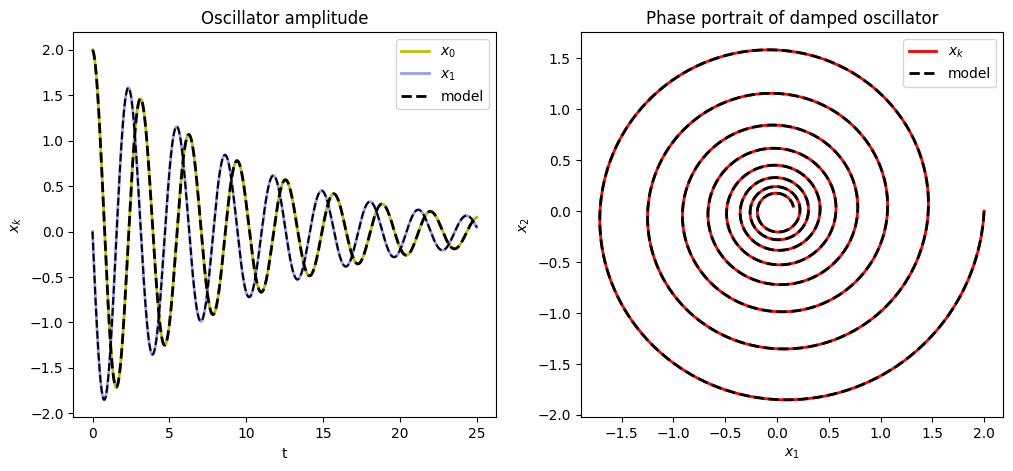

In [3]:
# Simulate and plot the results
x_sim = model.simulate(x0_train, t_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(t_train, x_train[:, 0], 'y', label='$x_0$', linewidth=2)
axs[0].plot(t_train, x_train[:, 1], 'b', label='$x_1$', alpha=0.4, linewidth=2)
axs[0].plot(t_train, x_sim[:, 0], 'k--', label='model', linewidth=2)
axs[0].plot(t_train, x_sim[:, 1], 'k--')
axs[0].set_title('Oscillator amplitude')
axs[0].legend()
axs[0].set(xlabel='t', ylabel='$x_k$')

axs[1].plot(x_train[:, 0], x_train[:, 1], 'r', label='$x_k$', linewidth=2)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], 'k--', label='model', linewidth=2)
axs[1].set_title('Phase portrait of damped oscillator')
axs[1].legend()
axs[1].set(xlabel='$x_1$', ylabel='$x_2$')
fig.show()

Training data by integrating the following a nonlinear two-dimensional damped harmonic oscillator.

$$
\frac{d}{dt} \left[\frac{x}{y} \right] = 
\begin{bmatrix}
-0.1 & 2 \\
-2 & -0.1 \\
\end{bmatrix} \left[\frac{x^3}{y^3} \right]
$$

In [4]:
# Create training data
x_train = solve_ivp(fun=cubic_damped_SHO,
                    t_span=t_train_span,
                    y0=x0_train,
                    t_eval=t_train,
                    **integrator_keywords).y.T

# Fit the model
model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_train, t=dt)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=5), feature_names=['x0', 'x1'],
      optimizer=STLSQ(threshold=0.05))

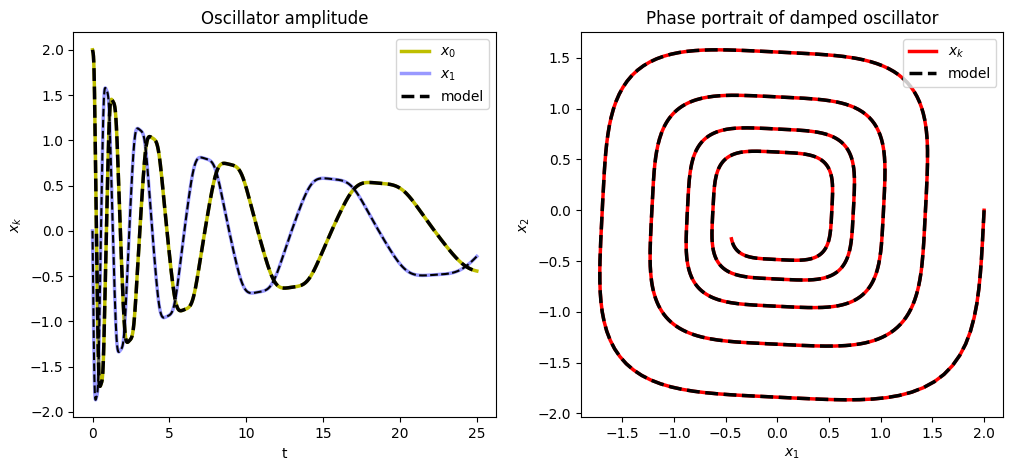

In [5]:
# Simulate and plot the results
x_sim = model.simulate(x0_train, t_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(t_train, x_train[:, 0], 'y', label='$x_0$', linewidth=2.5)
axs[0].plot(t_train, x_train[:, 1], 'b', label='$x_1$', alpha=0.4, linewidth=2.5)
axs[0].plot(t_train, x_sim[:, 0], 'k--', label='model', linewidth=2.5)
axs[0].plot(t_train, x_sim[:, 1], 'k--')
axs[0].set_title('Oscillator amplitude')
axs[0].legend()
axs[0].set(xlabel='t', ylabel='$x_k$')

axs[1].plot(x_train[:, 0], x_train[:, 1], 'r', label='$x_k$', linewidth=2.5)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], 'k--', label='model', linewidth=2.5)
axs[1].set_title('Phase portrait of damped oscillator')
axs[1].legend()
axs[1].set(xlabel='$x_1$', ylabel='$x_2$')
fig.show()

Training data by integrating the following a linear system in three dimensions.

$$
\frac{d}{dt} 
\begin{bmatrix} x \\ y \\ z \end{bmatrix} = 
\begin{bmatrix} -0.1 & -2 & 0 \\ 2 & -0.1 & 0 \\ 0 & 0 & -0.3 \end{bmatrix}
\begin{bmatrix} x \\ y \\ z \end{bmatrix}
$$

In [6]:
# Generate training data
dt = 0.01
t_train = np.arange(0, 50, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0, 1]
x_train = solve_ivp(linear_3D, t_train_span,
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

# Fit the model
poly_order = 5
threshold = 0.01

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order))
model.fit(x_train, t=dt)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=5),
      feature_names=['x0', 'x1', 'x2'], optimizer=STLSQ(threshold=0.01))

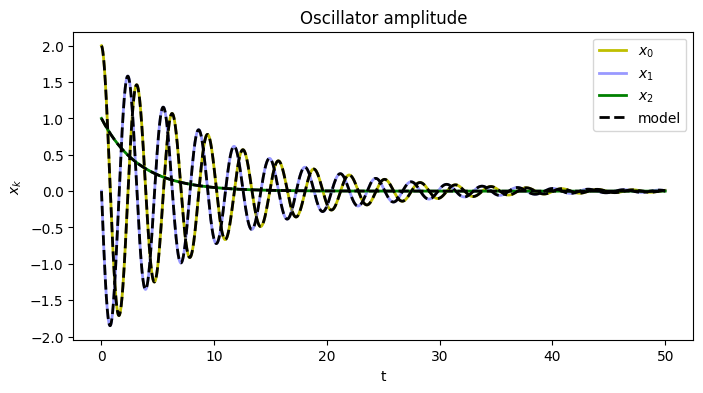

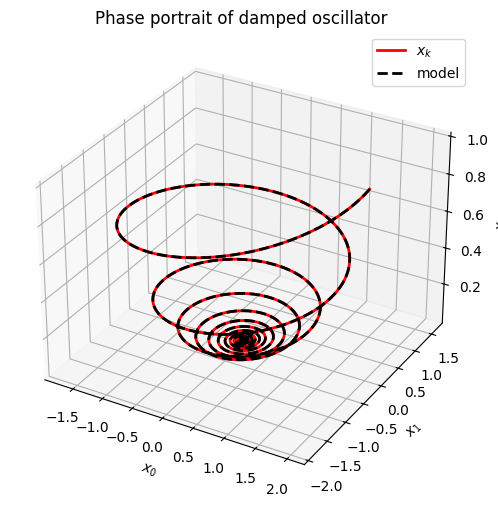

In [7]:
# Simulate and plot the results
x_sim = model.simulate(x0_train, t_train)

fig = plt.figure(figsize=(8, 4))
plt.plot(t_train, x_train[:, 0], 'y', label='$x_0$', linewidth=2)
plt.plot(t_train, x_train[:, 1], 'b', label='$x_1$', alpha=0.4, linewidth=2)
plt.plot(t_train, x_train[:, 2], 'g', label='$x_2$', linewidth=2)
plt.plot(t_train, x_sim[:, 0], 'k--', label='model', linewidth=2)
plt.plot(t_train, x_sim[:, 1], 'k--', linewidth=2)
plt.plot(t_train, x_sim[:, 2], 'k--', linewidth=2)
plt.title('Oscillator amplitude')
plt.legend()
plt.xlabel('t')
plt.ylabel('$x_k$')
fig.show()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], 'r', label='$x_k$', linewidth=2)
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2], 'k--', label='model', linewidth=2)
ax.set(xlabel='$x_0$', ylabel='$x_1$', zlabel='$x_2$')
ax.set_title('Phase portrait of damped oscillator')
ax.legend()
fig.show()